# Fatal Police Shootings Data

The Washington Post's database contains records of every fatal shooting in the United States by a police officer in the line of duty since Jan. 1, 2015.

https://github.com/washingtonpost/data-police-shootings

In [2]:
# Import dependencies
%matplotlib inline
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import rc
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta, date

In [3]:
# Read CSV File
df = pd.read_csv("/Users/nicolemuscanell/UCF-11-HTML-CSS/Data/shootings.csv")
df.head()

id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender      race           city state  signs_of_mental_illness threat_level  \
0      M     Asian        Shelton    WA                     True       attack   
1      M     White          Aloha    OR                    False       attack   
2      M  Hispanic        Wichita    KS                    False        other   
3      M     White  San Francisco    CA                     True       attack   
4      M  Hispanic          Evans    CO                    False       attack   

          flee  body_camera          arms_category  
0  Not fleeing        False                   Guns  
1  Not fleeing        False                   Guns  
2  Not fleeing        False                Unarmed  
3  Not fleeing        False  Other unusual objects  
4  Not fleeing        False       Piercing objects

In [4]:
# Creating DF
shootings_df = pd.DataFrame(df, columns=['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 
                                         'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee',
                                         'body_camera', 'arms_category'])
shootings_df.head()

id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender      race           city state  signs_of_mental_illness threat_level  \
0      M     Asian        Shelton    WA                     True       attack   
1      M     White          Aloha    OR                    False       attack   
2      M  Hispanic        Wichita    KS                    False        other   
3      M     White  San Francisco    CA                     True       attack   
4      M  Hispanic          Evans    CO                    False       attack   

          flee  body_camera          arms_category  
0  Not fleeing        False                   Guns  
1  Not fleeing        False                   Guns  
2  Not fleeing        False                Unarmed  
3  Not fleeing        False  Other unusual objects  
4  Not fleeing        False       Piercing objects

In [5]:
# Set the index
shootings_df.set_index('id', drop=True, inplace=True)
shootings_df.head()

name        date   manner_of_death       armed   age gender  \
id                                                                              
3           Tim Elliot  2015-01-02              shot         gun  53.0      M   
4     Lewis Lee Lembke  2015-01-02              shot         gun  47.0      M   
5   John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0      M   
8      Matthew Hoffman  2015-01-04              shot  toy weapon  32.0      M   
9    Michael Rodriguez  2015-01-04              shot    nail gun  39.0      M   

        race           city state  signs_of_mental_illness threat_level  \
id                                                                        
3      Asian        Shelton    WA                     True       attack   
4      White          Aloha    OR                    False       attack   
5   Hispanic        Wichita    KS                    False        other   
8      White  San Francisco    CA                     True       attack   
9   Hispanic          Evans    CO                    False       attack   

           flee  body_camera          arms_category  
id                                                   
3   Not fleeing        False                   Guns  
4   Not fleeing        False                   Guns  
5   Not fleeing        False                Unarmed  
8   Not fleeing        False  Other unusual objects  
9   Not fleeing        False       Piercing objects

In [5]:
# Convert Df to html for the website
shootings_table = shootings_df.to_html()
print(shootings_table)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>name</th>
      <th>date</th>
      <th>manner_of_death</th>
      <th>armed</th>
      <th>age</th>
      <th>gender</th>
      <th>race</th>
      <th>city</th>
      <th>state</th>
      <th>signs_of_mental_illness</th>
      <th>threat_level</th>
      <th>flee</th>
      <th>body_camera</th>
      <th>arms_category</th>
    </tr>
    <tr>
      <th>id</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>3</th>
      <td>Tim Elliot</td>
      <td>2015-01-02</td>
      <td>shot</td>
      <td>gun</td>
      <td>53.000000</td>
      <td>M</td>
      <td>Asian</td>
      <td>Shelton</td>
      <td>WA</td>
      <td>True</td>
      <td>attack</td>
      <td

In [6]:
# write html to file 
text_file = open("data.html", "w") 
text_file.write(shootings_table) 
text_file.close() 

## First analyses for quick facts page

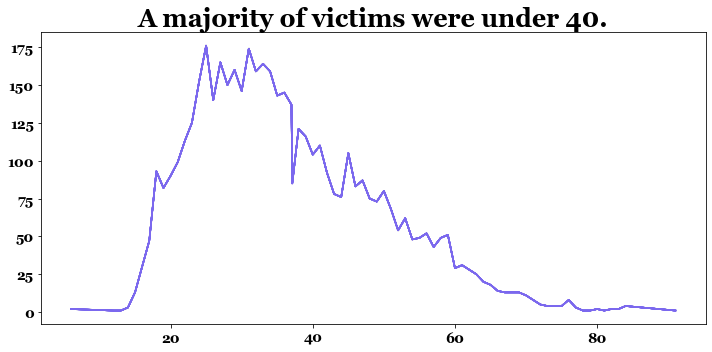

In [7]:
# Histogram plot - victim age
csfont = {'fontname': "Georgia"}

shootings_df.groupby('age').count().plot(color='mediumslateblue', legend=False, figsize=(10,5))
plt.title('A majority of victims were under 40.', fontsize=25, fontweight='bold', **csfont)
plt.xlabel('')
plt.xticks(fontsize=14, fontweight='bold', **csfont)
plt.yticks(fontsize=14, fontweight='bold', **csfont)
plt.tight_layout()

In [9]:
# Gender counts for quick facts
gender_counts = shootings_df.groupby(['gender'])["name"].count().sort_values(ascending=False)
gender_counts

gender
M    4673
F     222
Name: name, dtype: int64

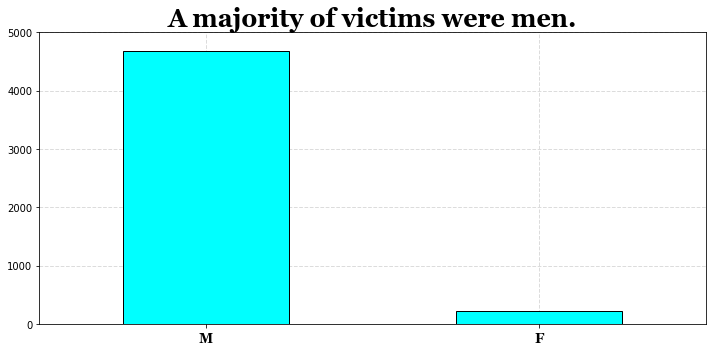

In [11]:
# Plot for gender
csfont = {'fontname': "Georgia"}

fig, ax = plt.subplots(facecolor='white')
ax = gender_counts.plot.bar(x='gender', y='counts', rot=360, legend=False, color='cyan', edgecolor='black', figsize=(10,5))
plt.title('A majority of victims were men.', fontsize=25, fontweight='bold', **csfont)
plt.xlabel('')
plt.xticks(fontsize=14, fontweight='bold', **csfont)
plt.ylim(0,5000,10)
plt.grid(color='gainsboro', linestyle='--', linewidth=1)
plt.rcParams['axes.axisbelow'] = True
plt.tight_layout()

In [12]:
# Body cam counts for quick facts
bodycam_counts = shootings_df.groupby(['body_camera'])["name"].count().sort_values(ascending=False)
bodycam_counts

body_camera
False    4317
True      578
Name: name, dtype: int64

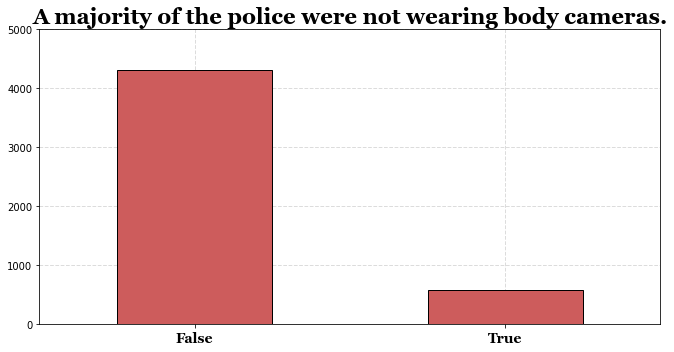

In [14]:
# Plot for body cam 
csfont = {'fontname': "Georgia"}

fig, ax = plt.subplots(facecolor='white')
ax = bodycam_counts.plot.bar(x='body_camera', y='counts', rot=360, legend=False, color='indianred', edgecolor='black', figsize=(10,5))
plt.title('A majority of the police were not wearing body cameras.', fontsize=22, fontweight='bold', **csfont)
plt.xlabel('')
plt.xticks(fontsize=14, fontweight='bold', **csfont)
plt.ylim(0,5000,10)
plt.grid(color='gainsboro', linestyle='--', linewidth=1)
plt.rcParams['axes.axisbelow'] = True
plt.tight_layout()

In [15]:
# Flee counts for quick facts
flee_counts = shootings_df.groupby(['flee'])["name"].count().sort_values(ascending=False)
flee_counts

flee
Not fleeing    3073
Car             820
Foot            642
Other           360
Name: name, dtype: int64

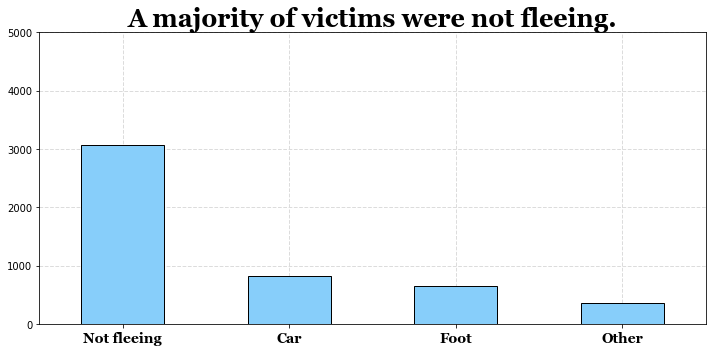

In [16]:
# Plot for flee status
csfont = {'fontname': "Georgia"}

fig, ax = plt.subplots(facecolor='white')
ax = flee_counts.plot.bar(x='flee', y='counts', rot=360, legend=False, color='lightskyblue', edgecolor='black', figsize=(10,5))
plt.title('A majority of victims were not fleeing.', fontsize=25, fontweight='bold', **csfont)
plt.xlabel('')
plt.xticks(fontsize=14, fontweight='bold', **csfont)
plt.ylim(0,5000,10)
plt.grid(color='gainsboro', linestyle='--', linewidth=1)
plt.rcParams['axes.axisbelow'] = True
plt.tight_layout()

In [56]:
# Total counts for quick facts
total_fatalities = shootings_df['name'].count()
total_fatalities

4895

## Analyses for main visualization pages and comparisons

In [8]:
# Counts for shootings by race
race_counts = shootings_df.groupby(['race'])["name"].count().sort_values(ascending=False)
#race_counts

# Total n size
total_n = shootings_df.groupby(['race'])["name"].count().sum()
#total_n

# Percentages for shootings by race
race_percent = (race_counts/total_n)*100
race_percent

race
White       50.582227
Black       26.516854
Hispanic    18.426966
Asian        1.899898
Native       1.593463
Other        0.980592
Name: name, dtype: float64

In [9]:
print(race_counts)

race
White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: name, dtype: int64


##  Race statistics in the US (for rate ratio calculations)
* https://www.statista.com/statistics/183489/population-of-the-us-by-ethnicity-since-2000/
* https://www.statista.com/statistics/259806/hispanic-population-of-the-us/
* https://worldpopulationreview.com/state-rankings/native-american-population

Calulation used: (Number of deaths by race/population of race) x 1,000

In [10]:
# Rate Ratios by Race - Black
black_rate = (1298/43000000)*1000
black_rate

0.030186046511627908

In [11]:
# Rate Ratios by Race - White
white_rate = (2476/249000000)*1000
white_rate

0.009943775100401607

In [12]:
# Rate Ratios by Race - Asian
asian_rate = (93/18000000)*1000
asian_rate

0.005166666666666667

In [13]:
# Rate Ratios by Race - Hispanic
hispanic_rate = (902/60000000)*1000
hispanic_rate

0.015033333333333334

In [14]:
# Rate Ratios by Race - Native American
native_rate = (78/6000000)*1000
native_rate

0.013

In [15]:
# Rates list
rates_list = [black_rate, hispanic_rate, white_rate, asian_rate, native_rate]
rates_list

[0.030186046511627908,
 0.015033333333333334,
 0.009943775100401607,
 0.005166666666666667,
 0.013]

In [16]:
# Rates list into DF
rates_df = pd.DataFrame(rates_list, index=['Black', 'Hispanic', 'White', 'Asian', 'Native'], 
                        columns=['Race Rates']).sort_values(by ='Race Rates', ascending=False)
rates_df

Race Rates
Black       0.030186
Hispanic    0.015033
Native      0.013000
White       0.009944
Asian       0.005167

In [17]:
# Rates list into DF
rates_df.reset_index()
rates_df

Race Rates
Black       0.030186
Hispanic    0.015033
Native      0.013000
White       0.009944
Asian       0.005167

In [18]:
rates_df['Race']=""
rates_df

Race Rates Race
Black       0.030186     
Hispanic    0.015033     
Native      0.013000     
White       0.009944     
Asian       0.005167

In [19]:
rates_df['Race']=['Black', 'Hispanic', 'Native', 'White', 'Asian']
rates_df

Race Rates      Race
Black       0.030186     Black
Hispanic    0.015033  Hispanic
Native      0.013000    Native
White       0.009944     White
Asian       0.005167     Asian

In [20]:
rates_df.reset_index()
rates_df

Race Rates      Race
Black       0.030186     Black
Hispanic    0.015033  Hispanic
Native      0.013000    Native
White       0.009944     White
Asian       0.005167     Asian

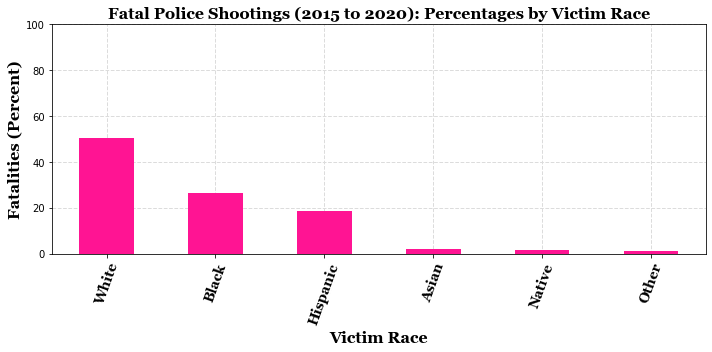

In [50]:
# Plot for race (using overall percentages)

csfont = {'fontname': "Georgia"}

fig, ax = plt.subplots(facecolor='white')
ax = race_percent.plot.bar(x='race', y='percent', rot=70, legend=False, color='deeppink', figsize=(10,5))
plt.title('Fatal Police Shootings (2015 to 2020): Percentages by Victim Race', fontsize=16, fontweight='bold', **csfont)
plt.ylabel("Fatalities (Percent)", fontsize=16, fontweight='bold', **csfont)
plt.xlabel("Victim Race", fontsize=16, fontweight='bold', **csfont)
plt.xticks(fontsize=14, fontweight='bold', **csfont)
plt.ylim(0,100,10)
plt.grid(color='gainsboro', linestyle='--', linewidth=1)
plt.rcParams['axes.axisbelow'] = True
plt.tight_layout()

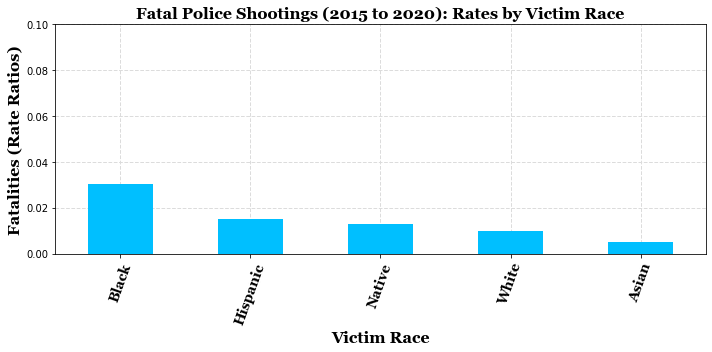

In [49]:
# Plot for race (using rate ratios)

csfont = {'fontname': "Georgia"}

ax = rates_df.plot.bar(x='Race', y='Race Rates', rot=70, legend=False, color='deepskyblue', figsize=(10, 5))
plt.title('Fatal Police Shootings (2015 to 2020): Rates by Victim Race', fontsize=16, fontweight='bold', **csfont)
plt.ylabel("Fatalities (Rate Ratios)", fontsize=16, fontweight='bold', **csfont)
plt.xlabel("Victim Race", fontsize=16, fontweight='bold', **csfont)
plt.xticks(fontsize=14, fontweight='bold', **csfont)
plt.ylim(0,.10,.05)
ax.set_facecolor('white')

plt.grid(color='gainsboro', linestyle='--', linewidth=1)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.facecolor'] = 'white'

plt.tight_layout()

In [21]:
# Viewing armed categories
shootings_df[('armed')].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'unknown',
       'shovel', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'metal object', 'screwdriver', 'lawn mower blade', 'flagpole',
       'guns and explosives', 'cordless drill', 'metal pole', 'Taser',
       'metal pipe', 'metal hand tool', 'blunt object', 'metal stick',
       'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'stapler', 'crossbow', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'vehicle', 'spear', 'chair', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet', 'pipe',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake', 'baton',
       'crowbar', 'oar', 'machete and gun', 'air conditioner',
       'pole and knife', 'beer bottle', 'base

In [22]:
# Re-categorizing armed variable into (armed(gun), armed(other), unarmed, and unknown)
armed_recat = shootings_df.replace(
    {"gun": "Armed (gun)", "gun and knife": "Armed (gun)", "guns and explosives": "Armed (gun)", 
     "hatchet and gun": "Armed (gun)", "machete and gun": "Armed (gun)", "gun and sword": "Armed (gun)",
     "gun and car": "Armed (gun)", "gun and vehicle": "Armed (gun)", "vehicle and gun": "Armed (gun)",
     
    "nail gun": "Armed (other)", "knife": "Armed (other)", "shovel": "Armed (other)", "hammer": "Armed (other)",
     "hatchet": "Armed (other)", "sword": "Armed (other)", "machete": "Armed (other)", "box cutter": "Armed (other)", 
     "metal object": "Armed (other)", "screwdriver": "Armed (other)", "lawn mower blade": "Armed (other)", 
     "flagpole": "Armed (other)", "cordless drill": "Armed (other)", "metal pole": "Armed (other)", 
     "Taser": "Armed (other)", "metal pipe": "Armed (other)", "metal hand tool": "Armed (other)", 
     "blunt object": "Armed (other)", "metal stick": "Armed (other)", "sharp object": "Armed (other)", 
     "meat cleaver": "Armed (other)", "carjack": "Armed (other)", "chain": "Armed (other)", 
     "contractor's level": "Armed (other)", "stapler": "Armed (other)", "crossbow": "Armed (other)", 
     "bean-bag gun": "Armed (other)", "baseball bat and fireplace poker": "Armed (other)",
     "straight edge razor": "Armed (other)", "ax": "Armed (other)", "brick": "Armed (other)", 
     "baseball bat": "Armed (other)", "hand torch": "Armed (other)", "chain saw": "Armed (other)", 
     "garden tool": "Armed (other)", "scissors": "Armed (other)", "pole": "Armed (other)", "pick-axe": "Armed (other)",
     "flashlight": "Armed (other)", "vehicle": "Armed (other)", "spear": "Armed (other)", "chair": "Armed (other)",
     "pitchfork": "Armed (other)", "rock": "Armed (other)", "piece of wood": "Armed (other)", "bayonet": "Armed (other)",
     "pipe": "Armed (other)", "glass shard": "Armed (other)", "motorcycle": "Armed (other)", "pepper spray": "Armed (other)",
     "metal rake": "Armed (other)", "baton": "Armed (other)", "crowbar": "Armed (other)", "oar": "Armed (other)", 
     "air conditioner": "Armed (other)", "pole and knife": "Armed (other)", "beer bottle": "Armed (other)", 
     "baseball bat and bottle": "Armed (other)", "fireworks": "Armed (other)", "pen": "Armed (other)", 
     "chainsaw": "Armed (other)",
    
     "unarmed": "Unarmed", "toy weapon": "Unarmed", "pellet gun": "Unarmed", "BB gun": "Unarmed", 
     "incendiary device": "Unarmed", "samurai sword": "Unarmed", "bow and arrow": "Unarmed", "wrench": "Unarmed", 
     "walking stick": "Unarmed", "barstool": "Unarmed", "grenade": "Unarmed", "BB gun and vehicle": "Unarmed", 
     "wasp spray": "Unarmed", "air pistol": "Unarmed", "baseball bat and knife": "Unarmed", 
     "vehicle and machete": "Unarmed", "ice pick": "Unarmed", "car, knife and mace": "Unarmed",
     
     "Unknown": "unknown"})

armed_recat.head(10)

name        date   manner_of_death          armed   age  \
id                                                                           
3            Tim Elliot  2015-01-02              shot    Armed (gun)  53.0   
4      Lewis Lee Lembke  2015-01-02              shot    Armed (gun)  47.0   
5    John Paul Quintero  2015-01-03  shot and Tasered        Unarmed  23.0   
8       Matthew Hoffman  2015-01-04              shot        Unarmed  32.0   
9     Michael Rodriguez  2015-01-04              shot  Armed (other)  39.0   
11    Kenneth Joe Brown  2015-01-04              shot    Armed (gun)  18.0   
13  Kenneth Arnold Buck  2015-01-05              shot    Armed (gun)  22.0   
15        Brock Nichols  2015-01-06              shot    Armed (gun)  35.0   
16        Autumn Steele  2015-01-06              shot        Unarmed  34.0   
17      Leslie Sapp III  2015-01-06              shot        Unarmed  47.0   

   gender      race           city state  signs_of_mental_illness  \
id                                                                  
3       M     Asian        Shelton    WA                     True   
4       M     White          Aloha    OR                    False   
5       M  Hispanic        Wichita    KS                    False   
8       M     White  San Francisco    CA                     True   
9       M  Hispanic          Evans    CO                    False   
11      M     White        Guthrie    OK                    False   
13      M  Hispanic       Chandler    AZ                    False   
15      M     White        Assaria    KS                    False   
16      F     White     Burlington    IA                    False   
17      M     Black      Knoxville    PA                    False   

   threat_level         flee  body_camera          arms_category  
id                                                                
3        attack  Not fleeing        False                   Guns  
4        attack  Not fleeing        False                   Guns  
5         other  Not fleeing        False                Unarmed  
8        attack  Not fleeing        False  Other unusual objects  
9        attack  Not fleeing        False       Piercing objects  
11       attack  Not fleeing        False                   Guns  
13       attack          Car        False                   Guns  
15       attack  Not fleeing        False                   Guns  
16        other  Not fleeing         True                Unarmed  
17       attack  Not fleeing        False  Other unusual objects

In [23]:
# Counts for shootings by whether victim's weapon status
armed_counts = armed_recat.groupby(['armed'])["name"].count().sort_values(ascending=False)
#armed_counts

# Total n size
total_n = armed_recat.groupby(['armed'])["name"].count().sum()
#total_n

# Percentages for shootings by race
armed_percent = (armed_counts/total_n)*100
armed_percent

armed
Armed (gun)      57.201226
Armed (other)    23.166496
Unarmed          11.092952
unknown           8.539326
Name: name, dtype: float64

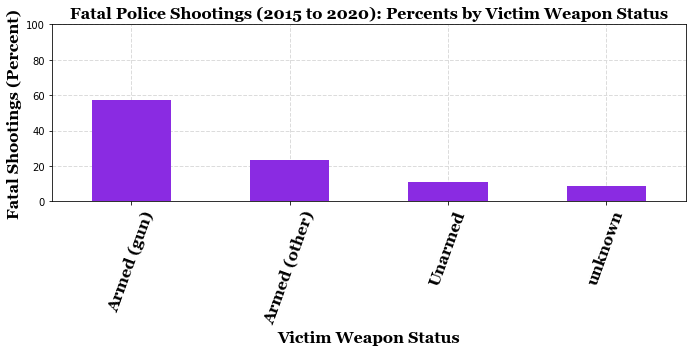

In [48]:
# Plot for weapon counts

csfont = {'fontname': "Georgia"}

fig, ax = plt.subplots(facecolor='white')
ax = armed_percent.plot.bar(x='armed', y='percent', rot=70, legend=False, color='blueviolet', figsize=(10, 5))
plt.title('Fatal Police Shootings (2015 to 2020): Percents by Victim Weapon Status', fontsize=16, fontweight='bold', **csfont)
plt.ylabel("Fatal Shootings (Percent)", fontsize=16, fontweight='bold', **csfont)
plt.xlabel("Victim Weapon Status", fontsize=16, fontweight='bold', **csfont)
plt.xticks(fontsize=16, fontweight='bold', **csfont)
plt.ylim(0,100,10)
ax.set_facecolor('white')
plt.grid(color='gainsboro', linestyle='--', linewidth=1)
plt.rcParams['axes.axisbelow'] = True
plt.tight_layout()

In [28]:
# Victim Weapon Status by Race
armed_by_race = armed_recat.groupby(['armed', 'race'])['name'].count()
armed_by_race

armed          race    
Armed (gun)    Asian         38
               Black        772
               Hispanic     459
               Native        41
               Other         20
               White       1470
Armed (other)  Asian         37
               Black        253
               Hispanic     256
               Native        23
               Other         17
               White        548
Unarmed        Asian         10
               Black        165
               Hispanic      98
               Native         6
               Other          6
               White        258
unknown        Asian          8
               Black        108
               Hispanic      89
               Native         8
               Other          5
               White        200
Name: name, dtype: int64

In [29]:
# Race counts from earlier
print(race_counts)

race
White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: name, dtype: int64


In [30]:
# Black victims weapon status (percentages)
black_gun = (772/1298)*100
black_armed_other = (253/1298)*100
black_unarmed =(165/1298)*100
black_unknown = (108/1298)*100

print(f"Percentage of Black vicitms armed with a gun {black_gun}")
print(f"Percentage of Black vicitms armed other weapons {black_armed_other}")
print(f"Percentage of Black vicitms unarmed {black_unarmed}")
print(f"Percentage of Black vicitms with unknown weapon status {black_unknown}")

Percentage of Black vicitms armed with a gun 59.47611710323575
Percentage of Black vicitms armed other weapons 19.491525423728813
Percentage of Black vicitms unarmed 12.711864406779661
Percentage of Black vicitms with unknown weapon status 8.320493066255779


In [31]:
# Percent of white victims that were armed
white_gun = (1470/2476)*100
white_armed_other = (548/2476)*100
white_unarmed =(258/2476)*100
white_unknown = (200/2476)*100

print(f"Percentage of White vicitms armed with a gun {white_gun}")
print(f"Percentage of White vicitms armed other weapons {white_armed_other}")
print(f"Percentage of White vicitms unarmed {white_unarmed}")
print(f"Percentage of White vicitms with unknown weapon status {white_unknown}")

Percentage of White vicitms armed with a gun 59.369951534733445
Percentage of White vicitms armed other weapons 22.132471728594506
Percentage of White vicitms unarmed 10.420032310177705
Percentage of White vicitms with unknown weapon status 8.077544426494345


In [32]:
black_weapons = [black_gun, black_armed_other, black_unarmed, black_unknown]
black_weapons

[59.47611710323575, 19.491525423728813, 12.711864406779661, 8.320493066255779]

In [33]:
white_weapons = [white_gun, white_armed_other, white_unarmed, white_unknown]
white_weapons

[59.369951534733445, 22.132471728594506, 10.420032310177705, 8.077544426494345]

In [34]:
weapons_df = pd.DataFrame(black_weapons, columns=['Black'])
weapons_df

Black
0  59.476117
1  19.491525
2  12.711864
3   8.320493

In [35]:
weapons_df['White']=""
weapons_df

Black White
0  59.476117      
1  19.491525      
2  12.711864      
3   8.320493

In [36]:
weapons_df['White']=white_weapons
weapons_df

Black      White
0  59.476117  59.369952
1  19.491525  22.132472
2  12.711864  10.420032
3   8.320493   8.077544

In [37]:
weapons_df['weapon_cat']=""
weapons_df

Black      White weapon_cat
0  59.476117  59.369952           
1  19.491525  22.132472           
2  12.711864  10.420032           
3   8.320493   8.077544

In [38]:
weapon_cat = ['gun', 'armed_other', 'unarmed', 'unknown']

In [39]:
weapons_df['weapon_cat']=weapon_cat
weapons_df

Black      White   weapon_cat
0  59.476117  59.369952          gun
1  19.491525  22.132472  armed_other
2  12.711864  10.420032      unarmed
3   8.320493   8.077544      unknown

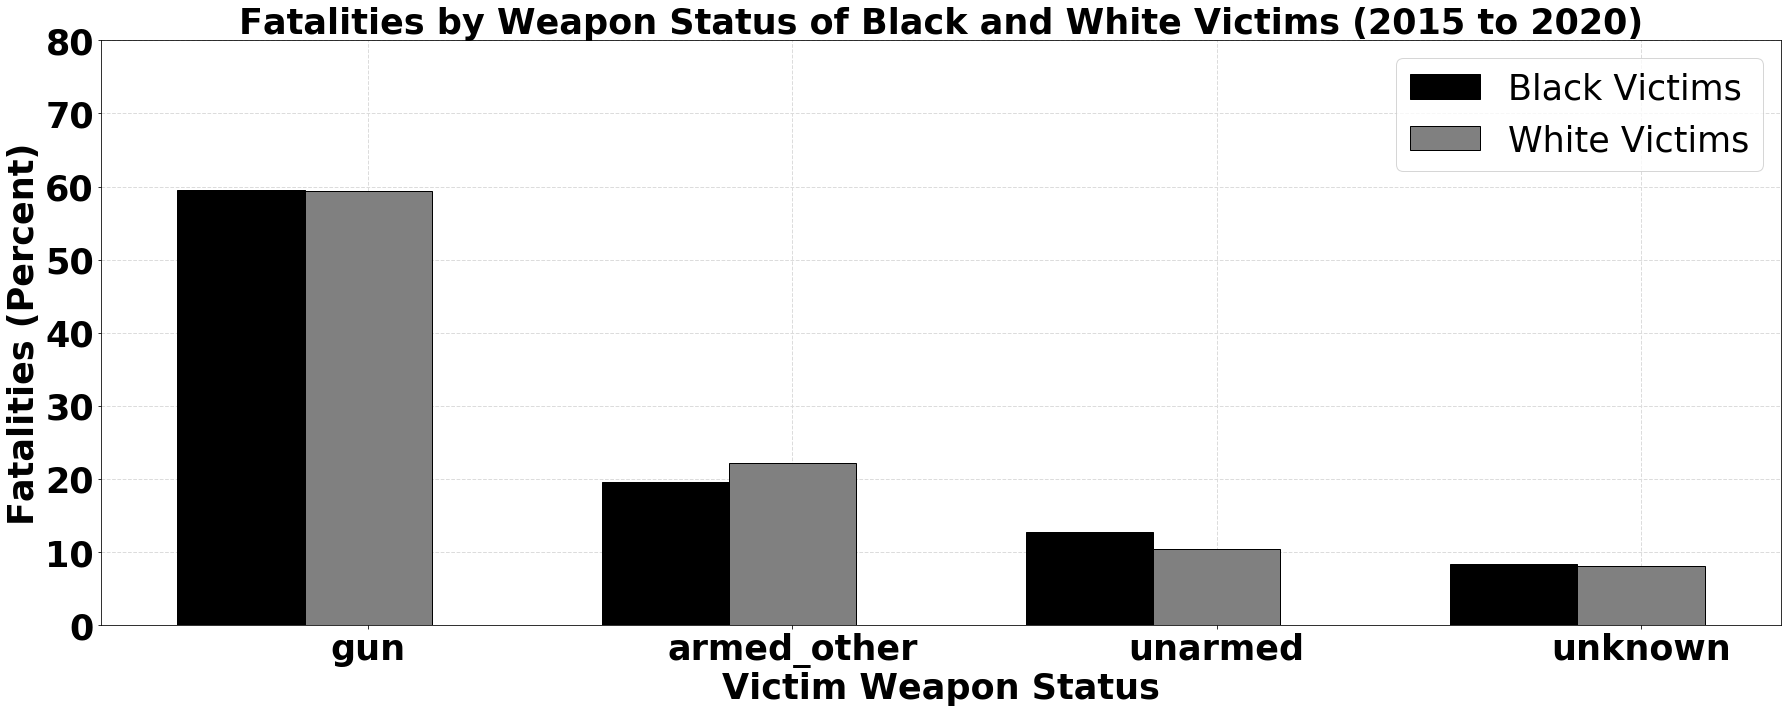

In [46]:
# Plot for weapon status by race (just focusing on black and white victims)

# set width of bar
barWidth = 0.30

# set height of bar
bars1 = weapons_df['Black']
bars2 = weapons_df['White']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Generate the plot
ax = plt.figure(figsize=(25, 10))
plt.bar(r1, bars1, color='black', width=barWidth, edgecolor='black', label='Black Victims')
plt.bar(r2, bars2, color='grey', width=barWidth, edgecolor='black', label='White Victims')

# Add xticks on the middle of the group bars
plt.xlabel('Victim Weapon Status', fontweight='bold', fontsize=35)
plt.ylabel('Fatalities (Percent)', fontweight='bold', fontsize=35)
plt.xticks([r + barWidth for r in range(len(bars1))], weapons_df['weapon_cat'], fontweight='bold', fontsize=35)
plt.yticks(fontweight='bold', fontsize=35)
plt.title("Fatalities by Weapon Status of Black and White Victims (2015 to 2020)", fontweight='bold', fontsize=35)
plt.ylim(0, 80, 10)
ax.set_facecolor('white')

# Grid
plt.grid(axis='both', color='gainsboro', linestyle='--', linewidth=1)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.facecolor'] = 'white'

# Create legend & Show graphic
plt.legend(fontsize=35)
plt.rcParams['axes.facecolor'] = 'white'
plt.tight_layout()